In [1]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
# portfolio_type = "stock"
# portfolio_type = "etf_usa"
portfolio_type = "etf_ge"

In [3]:
with open("metrics_"+portfolio_type+".pickle","rb") as f:
    naive_method = pickle.load(f)
    mvo_method = pickle.load(f)
    hrp_method = pickle.load(f)
    print(naive_method)
    print(mvo_method)
    print(hrp_method)

             % Return  Sharpe Ratio
Index Title                        
weekly          -1.90         -0.20
monthly         -5.07         -0.13
             % Return  Sharpe Ratio
Index Title                        
weekly          -0.38         -0.06
monthly         -1.81         -0.05
             % Return  Sharpe Ratio
Index Title                        
weekly          -1.58         -0.27
monthly         -4.09         -0.19


In [4]:
weekly_per_return = [naive_method['% Return'][0],
                     mvo_method['% Return'][0],
                     hrp_method['% Return'][0]]

monthly_per_return = [naive_method['% Return'][1],
                      mvo_method['% Return'][1],
                      hrp_method['% Return'][1]]

weekly_sharpe_ratio = [naive_method['Sharpe Ratio'][0],
                       mvo_method['Sharpe Ratio'][0],
                       hrp_method['Sharpe Ratio'][0]]

monthly_sharpe_ratio = [naive_method['Sharpe Ratio'][1],
                        mvo_method['Sharpe Ratio'][1],
                        hrp_method['Sharpe Ratio'][1]]

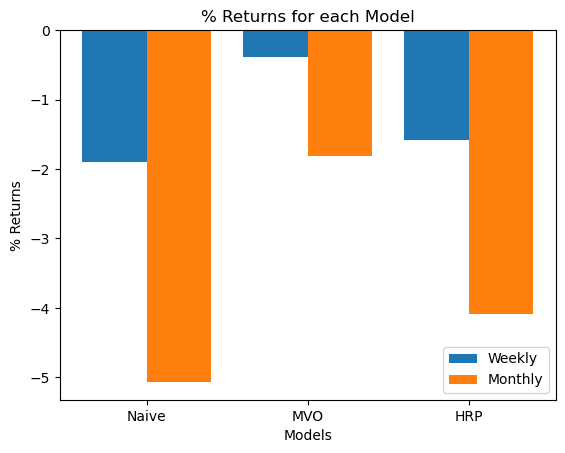

In [5]:
X = ['Naive','MVO','HRP']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, weekly_per_return, 0.4, label = 'Weekly')
plt.bar(X_axis + 0.2, monthly_per_return, 0.4, label = 'Monthly')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("% Returns")
plt.title("% Returns for each Model")
plt.legend()
plt.savefig
plt.show()

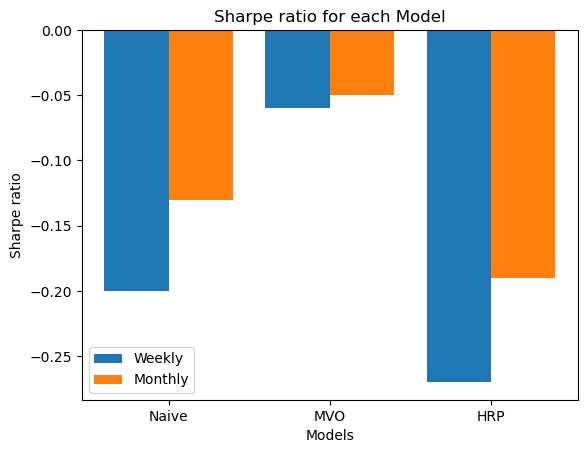

In [6]:
X = ['Naive','MVO','HRP']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, weekly_sharpe_ratio, 0.4, label = 'Weekly')
plt.bar(X_axis + 0.2, monthly_sharpe_ratio, 0.4, label = 'Monthly')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel('Sharpe ratio')
plt.title("Sharpe ratio for each Model")
plt.legend()
plt.show()

In [7]:
# with open("results/Naive/cum_return_"+portfolio_type+".pickle","wb") as f:
#     pickle.dump(cumulative_ret, f)
    
# with open("results/Naive/weighted_return_"+portfolio_type+".pickle","wb") as f:
#     pickle.dump(weighted_returns, f)
    
    
naive_cum_returns = []
mvo_cum_return = []
hrp_cum_return = []

with open("results/Naive/cum_return_"+portfolio_type+".pickle","rb") as f:
    naive_cum_return = pickle.load(f)
    
with open("results/MVO/cum_return_"+portfolio_type+".pickle","rb") as f:
    mvo_cum_return = pickle.load(f)

with open("results/HRP/cum_return_"+portfolio_type+".pickle","rb") as f:
    hrp_cum_return = pickle.load(f)

In [8]:
# pd.DataFrame(list(naive_cum_return), list(mvo_cum_return), list(hrp_cum_return))
data = pd.concat([naive_cum_return, mvo_cum_return, hrp_cum_return], axis=1)
data.columns = ['Naive', 'MVO', "HRP"]

In [9]:
data.dropna()

,Naive,MVO,HRP
Date,,,
2022-01-04,1.005388,1.009224,1.003715
2022-01-05,1.003008,1.008632,1.000036
2022-01-06,0.986039,0.997408,0.989618
2022-01-07,0.980179,0.992929,0.986325
2022-01-10,0.969838,0.981308,0.982551
...,...,...,...
2022-11-28,0.983490,1.055224,0.958447
2022-11-29,0.980737,1.051437,0.960299
2022-11-30,0.988428,1.060429,0.965076


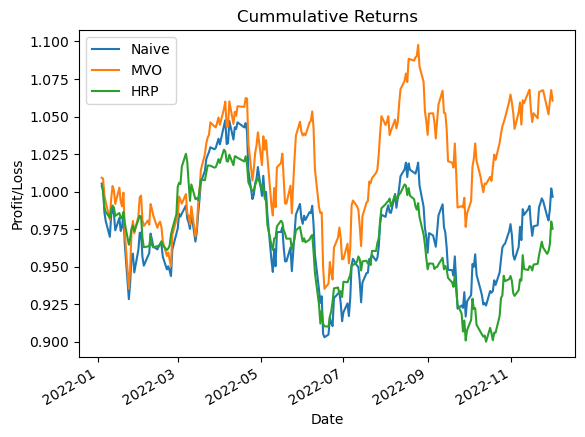

In [10]:
figure = data.plot.line(title = 'Cummulative Returns', ylabel='Profit/Loss').get_figure()
figure.savefig("results/cummulative_rets_"+portfolio_type+".png")